# Python数据科学分享——4.数理统计

> Python与概率论、数理统计的碰撞，发扬了概率编程的范式，让贝叶斯推断、统计模型更精彩，新工具方兴未艾——pymc4、edward2、numpyro

- toc: true 
- badges: true
- comments: true
- categories: [jupyter,Python,Data Science]



![](4.data-stats/4.data_stats.png)

Probability theory is nothing but common sense reduced to calculation.——Pierre Laplace, 1812

概率论就是把（不确定性）常识精简成计算——皮埃尔·拉普拉斯

统计定义：
1. “A branch of mathematics dealing with the collection, analysis, interpretation, and presentation of masses of numerical data.”(Webster's International Dictionary)
2. “The science and art of collecting, summarizing, and analyzing data that are subject to random variation.” (A Dictionary of Epidemiology).
3. 处理数据中变异性的科学与艺术——方积乾（中国统计学学家、中山大学教授）

# Python概率编程
(Probabilistic programming)

| 首发年份 | 名称 |简介|
| :-: | :-: |:-: |
| [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) | 2001 | Scipy概率与统计模块 |
| [PyMC](https://github.com/pymc-devs/pymc3) | 2009 | 纯Python概率编程库(PyMC3基于Theano) |
| [emcee](https://github.com/dfm/emcee) | 2010 | MCMC采样器库 |
| [pystan](https://github.com/stan-dev/pystan) | 2013 | 基于Stan(C++)的概率编程库 |
|[pomegranate](https://github.com/jmschrei/pomegranate)|2014|Cython实现的随机模型库|
| [ArviZ](https://github.com/arviz-devs/arviz) | 2015 | 贝叶斯推断（模型无关）统一接口|
| [edward](https://github.com/google/edward2) | 2016 | 基于Tensorflow的概率编程语言(edward2, 2019) |
| [tf-probability](https://github.com/tensorflow/probability) | 2016 | 基于Tensorflow的概率编程库 |
| [pyro](https://github.com/pyro-ppl/pyro) | 2017 | 基于PyTorch的概率编程库 |
|[numpyro](https://github.com/pyro-ppl/numpyro)| 2019|基于Nympy+JAX的概率编程库|

> [《统计计算》](http://www.math.pku.edu.cn/teachers/lidf/docs/statcomp/html/_statcompbook/sim-bootstrap.html) 李东风(北京大学数学科学学院 副教授)


In [1]:
# %matplotlib widget
from matplotlib.font_manager import _rebuild

_rebuild()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid", {"font.sans-serif": ["SimHei", "Arial"]})

import matplotlib as mpl

mpl.rcParams["figure.max_open_warning"] = 0

import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 100)
import scipy
from scipy import stats
import pymc3 as pm
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import edward2 as ed

# [概率基础](https://github.com/seeingtheory/Seeing-Theory)

以下介绍取自美国布朗大学《看见统计》，中文版bug多，而且前端资源网络问题，调整了一下放在服务器上运行

> 推荐视频教程浙江大学[概率论与数理统计](https://www.icourse163.org/course/ZJU-232005)，[概率论与数理统计--习题与案例分析](https://www.icourse163.org/course/ZJU-1001640007)


## [基本概念](http://10.2.3.100:8000/basic-probability) 
    随机事件 / 期望 / 方差
## [古典概型](http://10.2.3.100:8000/compound-probability)
    集合论 / 古典概型 / 条件概率 
## [概率分布](http://10.2.3.100:8000/probability-distributions)
    随机变量 / 离散型和连续型随机变量 / 中心极限定理 

## [统计推断：频率学派](http://10.2.3.100:8000/frequentist-inference)
    点估计理论 / 置信区间 / Bootstrap方法 
## [统计推断：贝叶斯学派](http://10.2.3.100:8000/frequentist-inference)
    贝叶斯公式 / 似然函数 / 从先验概率到后验概率 
## [回归分析](http://10.2.3.100:8000/regression-analysis)
    最小二乘法 / 相关性 / 方差分析

## [推断(inference)与预测(prediction)](https://www.datascienceblog.net/post/commentary/inference-vs-prediction/)


|对比| 推断|预测|
|:-:|:-:|:-:|
|模型选择| 对数据产生过程进行归因（Reason）,选择假设最合理的模型|对各种模型进行评估,选择性能最优的模型|
|模型验证	| 拟合优度检验（goodneess-of-fit tests）| 通过测试集的损失表现验证|
|模型应用	|解释数据产生的过程|	预测新特征的结果|
|统计日常| 咋了？啥样？为啥？| 让我们期待明天会更好|

# [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

scipy统计学模块，包括常见统计分布、极大似然估计、置信区间、假设检验等统计方法

## `numpy.random`随机分布

### 均匀分布（Standard uniform）

In [2]:
np.random.seed(1024)

np.random.rand(3, 4)

array([[0.64769123, 0.99691358, 0.51880326, 0.65811273],
       [0.59906347, 0.75306733, 0.13624713, 0.00411712],
       [0.14950888, 0.698439  , 0.59335256, 0.89991535]])

### 标准正态分布（Standard normal）

In [3]:
np.random.randn(3, 4)

array([[-1.87529904, -0.56850693, -0.06510141,  0.80681666],
       [-0.5778176 ,  0.57306064, -0.33667496,  0.29700734],
       [-0.37480416,  0.15510474,  0.70485719,  0.8452178 ]])

### 带配置参数的分布

#### 离散型分布

In [4]:
np.random.poisson(lam=10, size=(10,))

array([13,  8,  9,  7, 14,  9,  8, 11, 11,  9])

In [5]:
np.random.binomial(n=10, p=0.6, size=(10,))

array([5, 5, 8, 4, 6, 6, 6, 6, 8, 4])

In [6]:
np.random.negative_binomial(n=10, p=0.6, size=(10,))

array([ 5,  7,  9, 14, 15,  6, 14,  7,  9,  7])

In [7]:
np.random.geometric(p=0.6, size=(10,))

array([3, 3, 6, 1, 1, 3, 1, 2, 1, 1])

#### 连续分布

In [8]:
np.random.uniform(low=-1, high=1, size=(3, 4))

array([[ 0.88169829, -0.97506843, -0.3934696 ,  0.27655528],
       [ 0.60227603, -0.77024602, -0.40896008,  0.5647249 ],
       [ 0.95862598, -0.66679706,  0.77273023,  0.14810595]])

In [9]:
np.random.normal(loc=100, scale=15, size=(3, 4))

array([[113.23731981, 101.39008994,  87.03052898,  61.86347929],
       [111.61655881,  82.21339344, 102.73634972,  87.05919982],
       [107.51795522, 121.83893846,  94.13730255, 111.72173917]])

In [10]:
np.random.standard_t(df=3, size=(3, 4))

array([[-0.22458417, -0.72277945,  0.49479094,  4.08936976],
       [ 0.09470278, -0.42810122,  2.73248456, -0.27440016],
       [ 0.04688723, -1.85904818, -2.00913033, -1.51370431]])

In [11]:
np.random.beta(a=0.5, b=0.5, size=(10,))

array([0.67257261, 0.0744057 , 0.35638654, 0.37640555, 0.75432552,
       0.25481084, 0.47389881, 0.99394393, 0.04577132, 0.15859972])

#### 多变量分布

In [12]:
np.random.multinomial(n=4, pvals=[0.1, 0.2, 0.3, 0.4], size=5)

array([[0, 0, 2, 2],
       [1, 1, 0, 2],
       [0, 0, 1, 3],
       [0, 0, 0, 4],
       [0, 2, 1, 1]])

In [13]:
np.random.multivariate_normal(mean=[10, 10], cov=np.array([[3, 0.5], [0.5, 2]]), size=5)

array([[ 9.73763159,  9.49225394],
       [11.40208466, 10.01617814],
       [ 8.35730988, 11.13369124],
       [ 9.82584874, 10.64592839],
       [ 9.21820763,  9.10287525]])

## `scipy.stats`统计函数

假设[智商(IQ)](https://www.wanweibaike.com/wiki-IQ)服从均值为100、标准差为15的正态分布

In [14]:
dist = stats.norm(loc=100, scale=15)
dist

### 生成随机变量

In [15]:
dist.rvs(10)

array([ 92.66369207,  75.57944739, 134.27787431, 101.97179807,
       111.14296519, 120.19113585, 113.88208261, 116.91381411,
        95.80518317, 110.87883135])

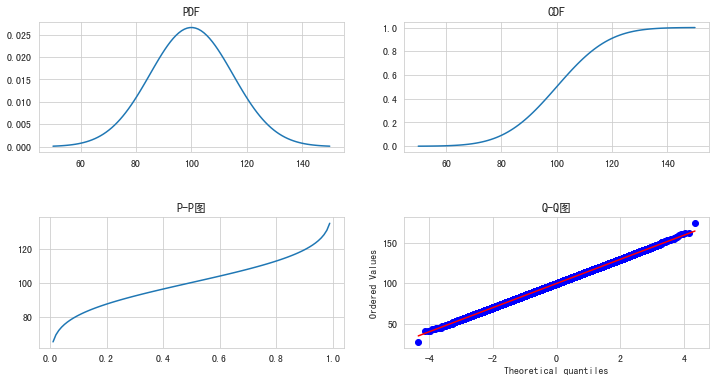

In [16]:
xs = np.linspace(50, 150, 100)

fig, ax = plt.subplots(2, 2, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
ax[0, 0].plot(xs, dist.pdf(xs))  # PDF
ax[0, 0].set_title("PDF")
ax[0, 1].plot(xs, dist.cdf(xs))  # CDF
ax[0, 1].set_title("CDF")
cdf = np.linspace(0, 1, 100)
ax[1, 0].plot(cdf, dist.ppf(cdf))  # P-P图
ax[1, 0].set_title("P-P图")
stats.probplot(dist.rvs(100_000), plot=ax[1, 1])
ax[1, 1].set_title("Q-Q图");

### 统计日常

**1**. 姚明智商132分，有多少人智商比他高？

![](4.data-stats/yaoming.jpg)

In [17]:
dist = stats.norm(loc=100, scale=15)

In [18]:
print(f"超过姚明智商的人数为：{100 * (1 - dist.cdf(132)):.3f}%")

超过姚明智商的人数为：1.645%


In [19]:
# 仿真方法：随机抽取1亿人，统计比姚明IQ高的人数占比

n = int(1e8)
samples = dist.rvs(n)

In [20]:
print(f"超过姚明智商的人数为：{100 * np.sum(samples > 132) / n:.3f}%")

超过姚明智商的人数为：1.646%


**2**. 有人说爱因斯坦的IQ是千里挑一，那么他的IQ是多少?

![](4.data-stats/einstein.jpg)

> 推荐：《上帝掷骰子吗:量子物理史话》——像武侠小说一样精彩的量子力学科普

In [21]:
dist.ppf(0.999)

146.3534845925172

In [22]:
# 仿真方法

samples = np.sort(samples)
samples[int(0.999 * n)]

146.3653368563009

**3**. IQ在(70, 90]区间的人有多少?

In [23]:
print(f"IQ在(70, 90]区间的人数占比为：{100 * dist.cdf(90) - dist.cdf(70):.2f}%")

IQ在(70, 90]区间的人数占比为：25.23%


In [24]:
# 仿真方法

np.sum((samples > 70) & (samples < 90)) / n

0.22976765

**4**. 测试了100个用户的IQ样本，计算参数$\mu$和$\sigma$的极大似然估计（MLE），以及$\mu$的95%置信区间

In [25]:
data = np.random.normal(110, 15, 100)

In [26]:
loc, scale = stats.norm.fit(data)
loc, scale

(111.18547994292243, 15.446518813564095)

In [27]:
dist = stats.norm(loc, scale)

95%置信区间

In [28]:
itv95 = dist.interval(0.95)
itv95

(80.91085938181644, 141.46010050402842)

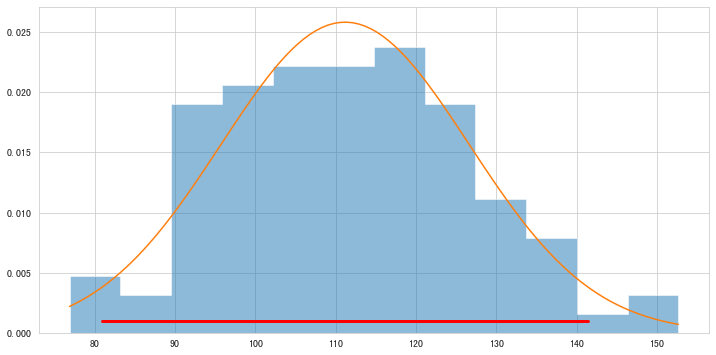

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
xs = np.linspace(data.min(), data.max(), 100)
ax.hist(data, 12, histtype="stepfilled", density=True, alpha=0.5)
ax.plot(xs, dist.pdf(xs))
ax.plot(itv95, [0.001, 0.001], c="r", linewidth=3);

# [PyMC](https://github.com/pymc-devs/pymc3)

Python的概率编程库，包括贝叶斯统计建模与概率模型，MCMC采样与变分推断。其中，pymc3基于Theano实现，pymc4(Pre-release)基于TensorFlow Probability实现，开源教程[Python概率编程与贝叶斯方法](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

In [30]:
pd.Series([d for d in dir(pm.distributions) if d[0].isupper()])

0                               AR
1                              AR1
2                        Bernoulli
3                             Beta
4                     BetaBinomial
5                         Binomial
6                            Bound
7                      Categorical
8                           Cauchy
9                       ChiSquared
10                        Constant
11                    ConstantDist
12                      Continuous
13                     DensityDist
14                       Dirichlet
15                        Discrete
16                 DiscreteUniform
17                 DiscreteWeibull
18                    Distribution
19                      ExGaussian
20                     Exponential
21                            Flat
22                         GARCH11
23                           Gamma
24              GaussianRandomWalk
25                       Geometric
26                          Gumbel
27                      HalfCauchy
28                  

分布函数

In [31]:
d = pm.Normal.dist(mu=0, sd=1)

In [32]:
d.dist()

随机采样

In [33]:
d.random(size=5)

array([-0.33071042, -1.03612079, -0.34140955, -0.07609122, -0.74469107])

对数概率——适用于各种极大似然估计场景

In [34]:
d.logp(0).eval()

array(-0.91893853)

## A/B测试

假设实验A点击率（点击用户数/总曝光用户数）是0-1均匀分布

In [35]:
with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)

In [36]:
p

p

按照多重伯努利实验抽样$X\ \sim \text{Ber}(p)$

In [37]:
p_true = 0.05  # 真实点击率
N = 1500

occurrences = stats.bernoulli.rvs(p_true, size=N)
occurrences

array([1, 1, 1, ..., 0, 0, 0])

In [38]:
np.sum(occurrences)

81

实验A的点击率

In [39]:
np.mean(occurrences)

0.054

In [40]:
np.mean(occurrences) == p_true

False

将样本传入PyMC3的`observed`变量

In [41]:
with model:
    obs = pm.Bernoulli("obs", p, observed=occurrences)
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 74000/74000 [00:11<00:00, 6576.51draws/s]
The number of effective samples is smaller than 25% for some parameters.


$p_A$的后验分布如下：

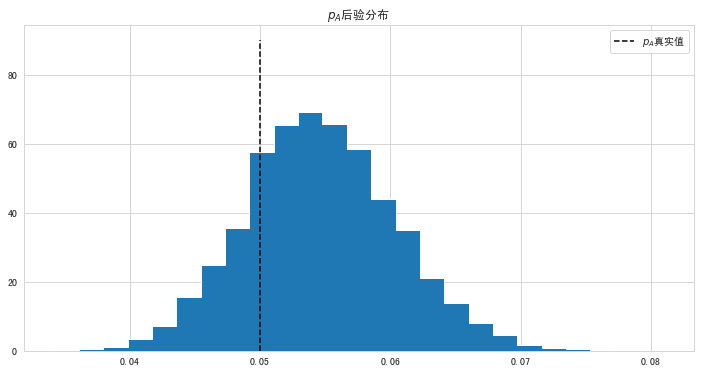

In [44]:
fig = plt.figure(figsize=(12,6))
plt.title("$p_A$后验分布")
plt.vlines(p_true, 0, 90, linestyle="--", label="$p_A$真实值")
plt.hist(burned_trace["p"], bins=25, histtype="stepfilled", density=True)
plt.legend();

### 实验A  VS 实验B 

我们需要对比实验A和实验B的差异，假设

1. 实验A样本量1500，真实点击率$p_A=0.05$
2. 实验B样本量750，真实点击率$p_B=0.04$
3. 两组实验差异$\text{delta} = p_A - p_B = 0.01$

> 贝叶斯推断对样本量差异不敏感

In [45]:
true_p_A = 0.05
true_p_B = 0.04

N_A = 1500
N_B = 750

observations_A = stats.bernoulli.rvs(true_p_A, size=N_A)
observations_B = stats.bernoulli.rvs(true_p_B, size=N_B)
print(f"实验A: {observations_A[:30]}...")
print(f"实验B: {observations_B[:30]}...")


实验A: [0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]...
实验B: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]...


In [46]:
np.mean(observations_A), np.mean(observations_B)

(0.04933333333333333, 0.044)

In [47]:
with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)

    delta = pm.Deterministic("delta", p_A - p_B)

    obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B)

    step = pm.Metropolis()
    trace = pm.sample(20000, step=step)
    burned_trace = trace[1000:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 4 chains, 0 divergences: 100%|██████████| 82000/82000 [00:15<00:00, 5137.09draws/s]
The number of effective samples is smaller than 25% for some parameters.


三个随机变量的后验分布: 

In [48]:
p_A_samples = burned_trace["p_A"]
p_B_samples = burned_trace["p_B"]
delta_samples = burned_trace["delta"]

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
ax = plt.subplot(311)
plt.xlim(0, 0.1)
plt.hist(
    p_A_samples,
    histtype="stepfilled",
    bins=25,
    alpha=0.85,
    label="$p_A$后验",
    color="#A60628",
    density=True,
)
plt.vlines(true_p_A, 0, 80, linestyle="--", label="$p_A$真实值")
plt.legend(loc="upper right")
plt.title("$p_A$, $p_B$和delta后验分布")
ax = plt.subplot(312)
plt.xlim(0, 0.1)
plt.hist(
    p_B_samples,
    histtype="stepfilled",
    bins=25,
    alpha=0.85,
    label="$p_B$后验",
    color="#467821",
    density=True,
)
plt.vlines(true_p_B, 0, 80, linestyle="--", label="$p_B$真实值")
plt.legend(loc="upper right")
ax = plt.subplot(313)
plt.hist(
    delta_samples,
    histtype="stepfilled",
    bins=25,
    alpha=0.85,
    label="delta后验",
    color="#7A68A6",
    density=True,
)
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--", label="delta真实值")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.legend(loc="upper right");

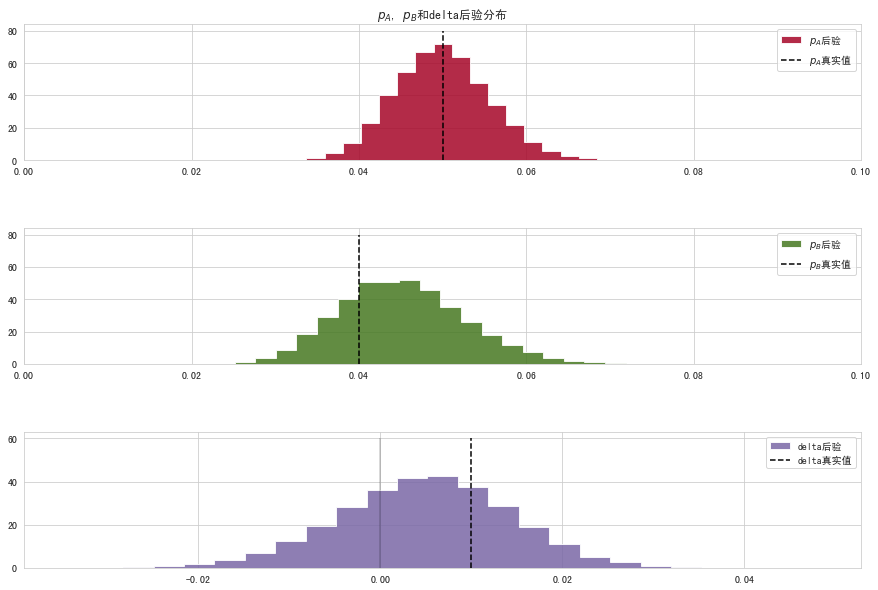

In [50]:
fig.savefig("AB_test.png")

实验A样本量`N_A = 1500`大于实验B样本量`N_B = 750`，因此$p_B$的后验分布比$p_A$的后验分布宽，说明$p_B$不确定性比$p_A$高。

### 实验结论

$\text{delta}$的后验分布大多数>0，因此可以推断实验A效果大概率比实验B效果好。

实验A比实验B效果差的概率：

In [51]:
np.mean(delta_samples < 0)

0.29823684210526313

实验A比实验B效果好的概率：

In [52]:
np.mean(delta_samples > 0)

0.7017631578947369

# 高斯过程回归
（Gaussian Process Regression，GPR）


假设从正态分布抽样一组带噪声 $\epsilon$ 的样本

$$
    y \sim \mathcal{N}(\mu = f(x), \sigma=\epsilon)
$$

对于线性回归问题 $f(x) = ax + b$

高斯过程可以给出先验分布 $f$

$$
f(x) \sim \mathcal{GP}(\mu_x, K(x, x^T, h))
$$

其中，$\mu_x$是函数均值，$K(x, x^T)$是核函数的协方差矩阵，$h$是数据平滑参数

> 高斯过程可以生成任意曲线（曲面），必要条件是噪声能够近似成高斯分布，经典的线性回归模型都可以看作是高斯过程模型。

## 生成模型示例

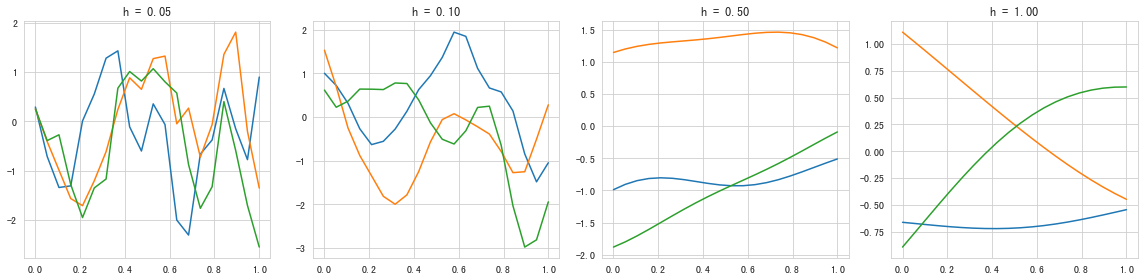

In [53]:
def gauss_kernel(x, knots, h):
    return np.array([np.exp(-((x - k) ** 2) / (2 * h ** 2)) for k in knots])


plt.figure(figsize=(16, 4))
hs = [0.05, 0.1, 0.5, 1]
x = np.linspace(0, 1, 20)
for i, h in enumerate(hs):
    plt.subplot(1, 4, i + 1)
    for j in range(3):
        plt.plot(x, stats.multivariate_normal.rvs(cov=gauss_kernel(x, x, h)))
    plt.title("h = %.2f" % h)
plt.tight_layout()

## 模型示例

In [54]:
n = 20
xs = np.r_[
    np.linspace(0, 0.5 * np.pi, 8),
    np.linspace(0.5 * np.pi, 1.5 * np.pi, 4),
    np.linspace(1.5 * np.pi, 2 * np.pi, 8),
]
ys = np.sin(xs) + np.random.normal(0, 0.2, n)

xp = np.c_[np.linspace(0, 2 * np.pi, 100)]

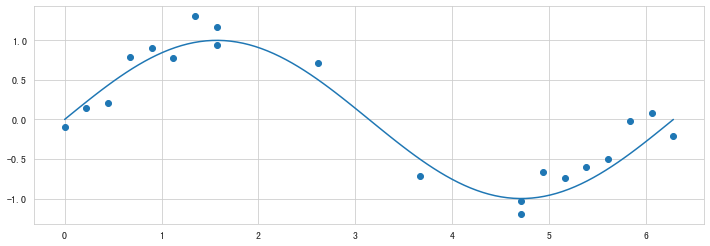

In [55]:
fig = plt.figure(figsize=(12, 4))
ax = plt.axes()
ax.scatter(xs, ys)
ax.plot(xp, np.sin(xp));

In [56]:
with pm.Model() as gp_context:
    h = pm.Gamma("h", 2, 0.5)
    c = pm.gp.cov.ExpQuad(1, ls=h)
    gp = pm.gp.Marginal(cov_func=c)
    ϵ = pm.HalfCauchy("e", 1)
    y_est = gp.marginal_likelihood("y_est", X=np.c_[xs], y=ys, noise=ϵ)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
xa = np.linspace(0, 20, 200)
alphas = [1.0, 2.0, 3.0, 7.5]
betas = [0.5, 0.5, 1.0, 1.0]
for a, b in zip(alphas, betas):
    pdf = stats.gamma.pdf(xa, a, scale=1.0 / b)
    ax[0].plot(xa, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(a, b))
ax[0].set_xlabel("x", fontsize=12)
ax[0].set_ylabel("f(x)", fontsize=12)
ax[0].legend(loc=1)

xa = np.linspace(0, 5, 200)
for b in [0.5, 1.0, 2.0]:
    pdf = stats.cauchy.pdf(xa, scale=b)
    ax[1].plot(xa, pdf, label=r"$\beta$ = {}".format(b))
ax[1].set_xlabel("x", fontsize=12)
ax[1].set_ylabel("f(x)", fontsize=12)
ax[1].legend(loc=1);

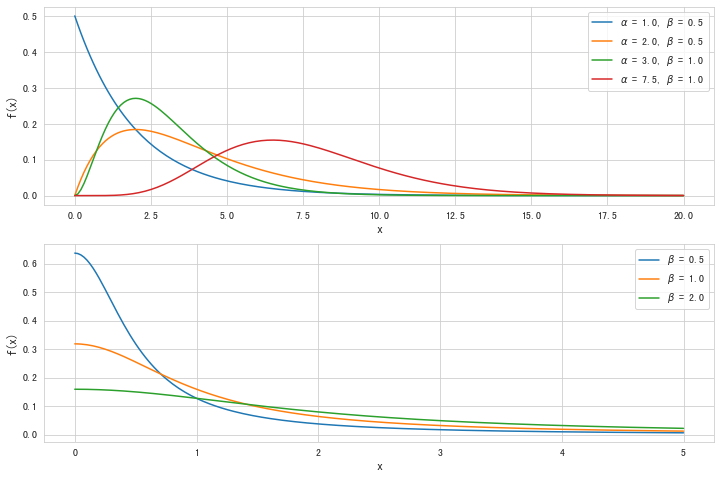

In [57]:
fig.show()

In [59]:
with gp_context:
    trace = pm.sample(tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [e, h]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:04<00:00, 1338.14draws/s]


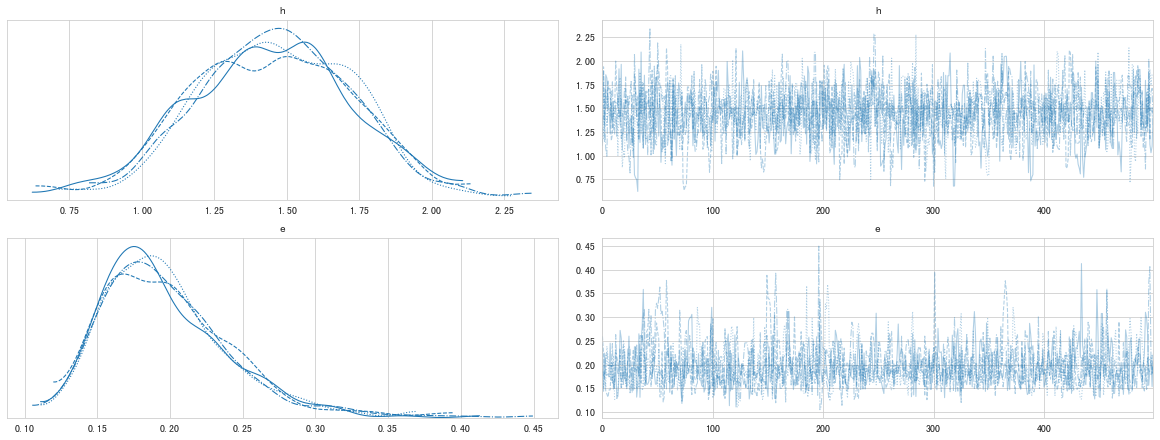

In [60]:
pm.traceplot(trace,figsize=(16, 6));

In [61]:
with gp_context:
    fp = gp.conditional("fp", xp)
    ppc = pm.sample_posterior_predictive(trace, vars=[fp], samples=100)

100%|██████████| 100/100 [00:07<00:00, 13.40it/s]


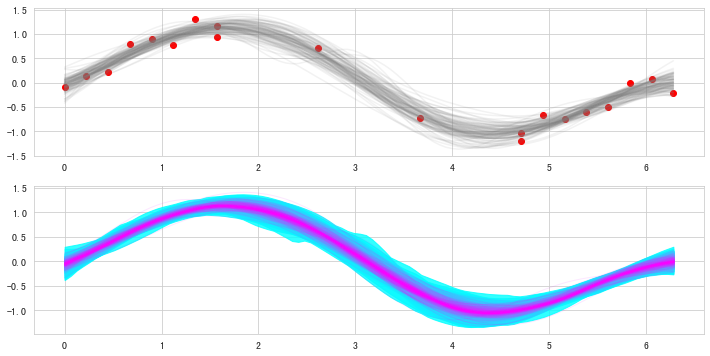

In [62]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].plot(xp, ppc["fp"].T, c="grey", alpha=0.1)
ax[0].scatter(xs, ys, c="red")
pm.gp.util.plot_gp_dist(ax[1], ppc["fp"], xp, palette="cool")
fig.show();

# [tesnorflow.probability](https://github.com/tensorflow/probability)

基于tesnorflow的贝叶斯推断和统计分析库

## 随机分布

In [68]:
tfd = tfp.distributions

In [69]:
pd.Series([str(x).split(".")[-1][:-2] for x in tfd.distribution.Distribution.__subclasses__()])

0                         Autoregressive
1                           BatchReshape
2                              Bernoulli
3                                   Beta
4                                  Gamma
5                               Binomial
6                           BetaBinomial
7                      JointDistribution
8                      JointDistribution
9                                  _Cast
10                             Blockwise
11                           Categorical
12                                Cauchy
13                                  Chi2
14               TransformedDistribution
15                                Normal
16                                   LKJ
17                           CholeskyLKJ
18                    _BaseDeterministic
19                    _BaseDeterministic
20                             Dirichlet
21                           Multinomial
22                  DirichletMultinomial
23                    DoublesidedMaxwell
24              

In [70]:
dist = tfd.Normal(loc=100, scale=15)

In [71]:
x = dist.sample((3, 4))
x

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 94.99498 , 107.465   ,  92.16038 , 119.55264 ],
       [105.00224 ,  99.26422 , 106.99145 ,  73.55863 ],
       [105.61177 ,  92.737144, 121.1416  ,  90.87714 ]], dtype=float32)>

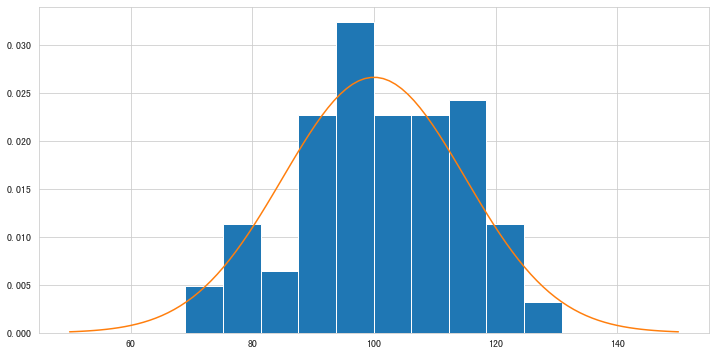

In [72]:
n = 100
fig, ax = plt.subplots(figsize=(12, 6))

xs = dist.sample(n)
ax.hist(xs, density=True)

xp = tf.linspace(50.0, 150.0, 100)
ax.plot(xp, dist.prob(xp));

## 随机采样

In [73]:
dist = tfd.Normal(loc=[3, 4, 5, 6], scale=0.5)

In [74]:
dist.sample(5)

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[2.325097 , 4.3809695, 6.011235 , 6.6105776],
       [2.8294497, 4.795865 , 4.3433237, 5.784731 ],
       [3.8394353, 3.9012687, 4.900641 , 5.8869133],
       [2.7562547, 3.839128 , 4.772919 , 6.0769143],
       [2.497485 , 4.127298 , 4.343773 , 5.853659 ]], dtype=float32)>

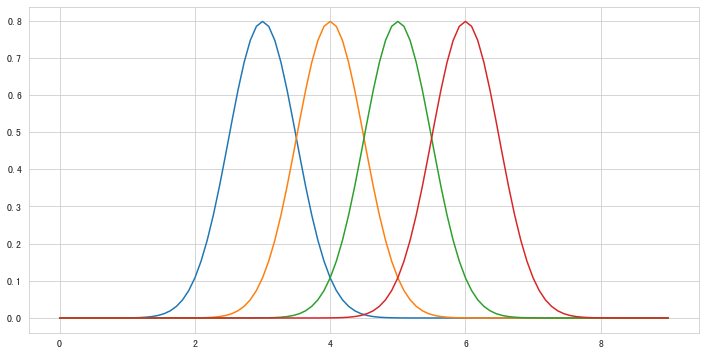

In [75]:
xp = tf.linspace(0.0, 9.0, 100)[:, tf.newaxis]
fig = plt.figure(figsize=(12, 6))
plt.plot(np.tile(xp, dist.batch_shape), dist.prob(xp));

## 高斯混合模型

In [76]:
gmm = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(probs=[0.4, 0.1, 0.2, 0.3]),
    components_distribution=tfd.Normal(
        loc=[3.0, 4.0, 5.0, 6.0], scale=[0.1, 0.5, 0.5, 0.1]
    ),
)

xs = gmm.sample(10000)

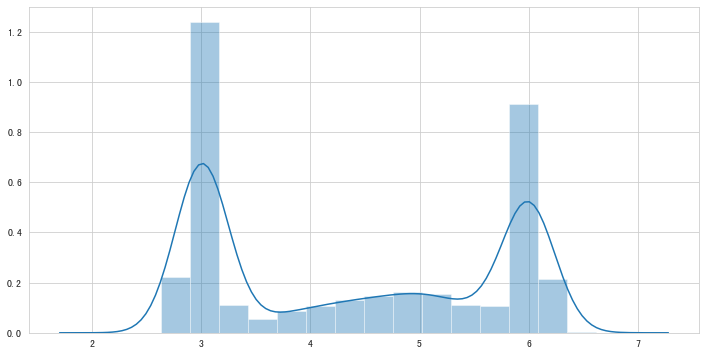

In [77]:
fig = plt.figure(figsize=(12, 6))
sns.distplot(xs);

## TFP高斯过程回归

In [78]:
xs = tf.Variable([0.0, 1.0, 2.0, 5.0, 6.0, 8.0])
ys = tf.sin(xs) + tfd.Normal(loc=0, scale=0.5).sample(xs.shape[0])
xp = tf.linspace(-1.0, 9.0, 100)[:, None]

In [79]:
kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(length_scale=1.5)
reg = tfd.GaussianProcessRegressionModel(
    kernel, xp[:, tf.newaxis], xs[:, tf.newaxis], ys
)

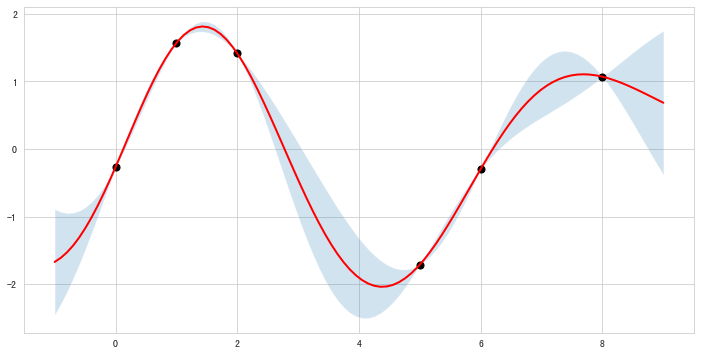

In [80]:
ub, lb = reg.mean() + [2 * reg.stddev(), -2 * reg.stddev()]
fig, ax = plt.subplots(figsize=(12, 6))
ax.fill_between(np.ravel(xp), np.ravel(ub), np.ravel(lb), alpha=0.2)
ax.plot(xp, reg.mean(), c="red", linewidth=2)
ax.scatter(xs[:], ys[:], s=50, c="k");

# [Edward2](https://github.com/google/edward2)

Edward2是谷歌推出的*简单*概率编程语言，基于NumPy和TensorFlow生态系统构建，可以将模型编写为概率模块与模型计算结合，从而实现灵活的训练和推理。

Edward2借助GPU提升计算性能，谷歌使用[NUTS](https://papers.nips.cc/paper/7987-simple-distributed-and-accelerated-probabilistic-programming.pdf)(No-U-Turn Sampler, HMC变体)采样实现贝叶斯逻辑回归（Bayesian logistic regression）的运行时间对比。

| 模块 | 运行时间 (ms) |
|:-:|:-:|
| Stan (CPU) | 201.0|
| PyMC3 (CPU) | 74.8| 
| Handwritten TF (CPU)| 66.2| 
| Edward2 (CPU)|  68.4| 
| Handwritten TF (1 GPU) | 9.5| 
| Edward2 (1 GPU)|  9.7| 
| Edward2 (8 GPU)|  2.3| 

## 随机变量

In [81]:
normal_rv = ed.Normal(loc=0., scale=1.)
normal_rv

<ed.RandomVariable 'Normal' shape=() dtype=float32 numpy=-0.8224109>

In [82]:
normal_rv.distribution.log_prob(1.231)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.6766189>

In [83]:
dirichlet_rv = ed.Dirichlet(concentration=tf.ones([2, 10]))
dirichlet_rv

<ed.RandomVariable 'Dirichlet' shape=(2, 10) dtype=float32 numpy=
array([[0.31023756, 0.07827895, 0.08835499, 0.03265208, 0.04359685,
        0.02597943, 0.07192924, 0.15645337, 0.025865  , 0.16665252],
       [0.31551656, 0.08522676, 0.1547178 , 0.10970751, 0.06513554,
        0.03616604, 0.02903147, 0.1352999 , 0.01480891, 0.05438948]],
      dtype=float32)>

## 基本操作

In [84]:
x = ed.Normal(loc=tf.zeros(20), scale=tf.ones(20)); x

<ed.RandomVariable 'Normal' shape=(20,) dtype=float32 numpy=
array([ 0.7987103 ,  0.14509809,  0.8323622 ,  0.29810244,  0.08135905,
       -0.49820969, -1.5680871 ,  0.9793448 ,  0.8511595 ,  1.2923892 ,
       -0.16361478,  0.61047137,  0.21112299,  0.20411171, -1.4496089 ,
        0.95102966,  0.83335084,  0.7262526 ,  0.03912232, -1.5042037 ],
      dtype=float32)>

In [85]:
y = 5; x + y, x / y

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([5.7987103, 5.145098 , 5.832362 , 5.2981024, 5.081359 , 4.5017905,
        3.431913 , 5.979345 , 5.8511596, 6.292389 , 4.8363853, 5.6104712,
        5.211123 , 5.2041116, 3.5503912, 5.95103  , 5.8333507, 5.7262526,
        5.039122 , 3.4957962], dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([ 0.15974206,  0.02901962,  0.16647243,  0.05962049,  0.01627181,
        -0.09964193, -0.3136174 ,  0.19586895,  0.17023191,  0.25847784,
        -0.03272296,  0.12209427,  0.0422246 ,  0.04082234, -0.2899218 ,
         0.19020593,  0.16667017,  0.14525053,  0.00782446, -0.30084074],
       dtype=float32)>)

In [86]:
tf.tanh(x * y)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 0.99932045,  0.6202987 ,  0.99951476,  0.90341896,  0.38574815,
       -0.9863742 , -0.99999964,  0.9998883 ,  0.9995977 ,  0.99999523,
       -0.6740202 ,  0.99554545,  0.7839798 ,  0.770094  , -0.99999905,
        0.9998518 ,  0.99951935,  0.9985982 ,  0.19315422, -0.9999994 ],
      dtype=float32)>

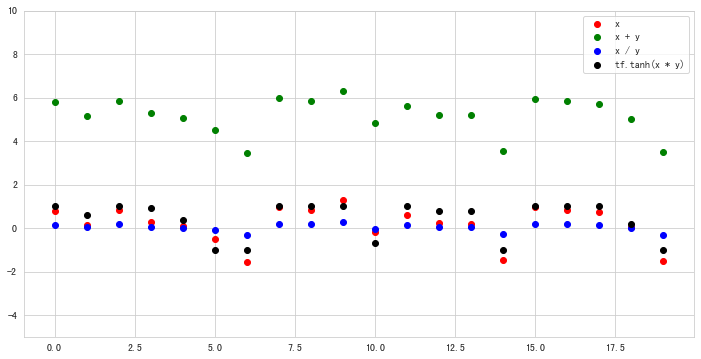

In [87]:
base = tf.range(20)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(base[:], x[:], c="r", label="x")
ax.scatter(base[:], (x + y)[:], c="g", label="x + y")
ax.scatter(base[:], (x / y)[:], c="b", label="x / y")
ax.scatter(base[:], tf.tanh(x * y)[:], c="k", label="tf.tanh(x * y)")
ax.set_ylim(-5, 10)
ax.legend(loc='upper right');